In [22]:
import pandas as pd                 

In [23]:
online_retail_df = pd.read_csv('online_retail_II.csv')

In [24]:
online_retail_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom


In [25]:
online_retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541910 non-null  object 
 1   StockCode    541910 non-null  object 
 2   Description  540456 non-null  object 
 3   Quantity     541910 non-null  int64  
 4   InvoiceDate  541910 non-null  object 
 5   Price        541910 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      541910 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [26]:
online_retail_df.describe()

,Quantity,Price,Customer ID
count,541910.000000,541910.000000,406830.000000
mean,9.552234,4.611138,15287.684160
std,218.080957,96.759765,1713.603074
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [27]:
online_retail_df.describe(include='all')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
count,541910,541910,540456,541910.000000,541910,541910.000000,406830.000000,541910
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,31/10/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552234,NaN,4.611138,15287.684160,NaN
std,NaN,NaN,NaN,218.080957,NaN,96.759765,1713.603074,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


In [28]:
online_retail_sample = online_retail_df.sample(frac=0.2, replace=False, random_state=1)

In [29]:
online_retail_sample.shape

(108382, 8)

In [30]:
online_retail_sample.nunique()

Invoice        18203
StockCode       3640
Description     3708
Quantity         338
InvoiceDate    16991
Price            620
Customer ID     4104
Country           38
dtype: int64

In [31]:
online_retail_sample['Country'].unique()

array(['United Kingdom', 'EIRE', 'Germany', 'France', 'Spain', 'Japan',
       'Cyprus', 'Switzerland', 'Denmark', 'Netherlands',
       'Channel Islands', 'European Community', 'Norway', 'Portugal',
       'Sweden', 'Belgium', 'Austria', 'Finland', 'Australia', 'Malta',
       'Czech Republic', 'Unspecified', 'Italy', 'Hong Kong', 'Canada',
       'Israel', 'USA', 'Singapore', 'United Arab Emirates', 'Greece',
       'Saudi Arabia', 'Lithuania', 'Brazil', 'Poland', 'Iceland', 'RSA',
       'Lebanon', 'Bahrain'], dtype=object)

### Dealing with missing values

In [32]:
online_retail_sample.isnull().sum()

Invoice            0
StockCode          0
Description      281
Quantity           0
InvoiceDate        0
Price              0
Customer ID    27004
Country            0
dtype: int64

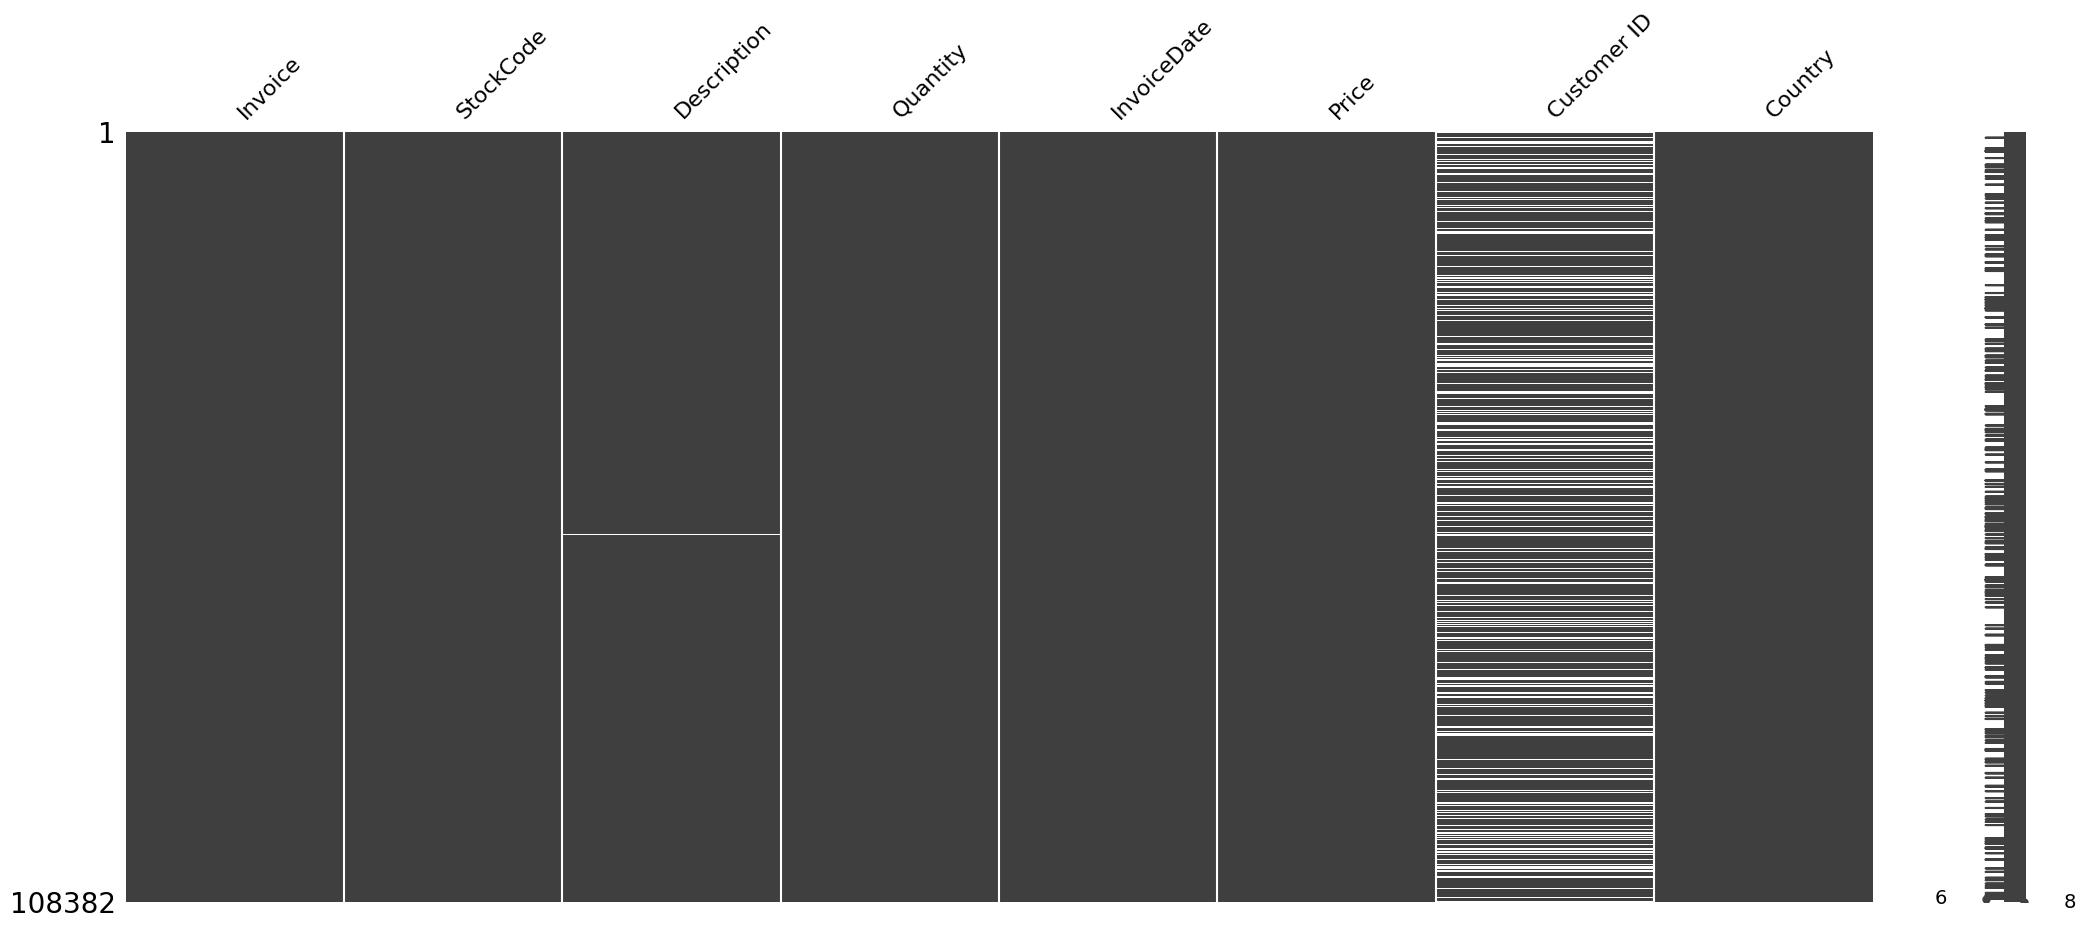

In [33]:
import missingno as msno 
msno.matrix(online_retail_sample);

One approach is to remove all rows with missing values

In [34]:
ors_missing_removed = online_retail_sample.dropna()

In [35]:
ors_missing_removed.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [36]:
online_retail_sample.shape

(108382, 8)

In [37]:
ors_missing_removed.shape

(81378, 8)

In [59]:
ors_missing_removed_all = online_retail_sample.dropna(how='all')

In [60]:
ors_missing_removed_all.shape

(108382, 8)

In [61]:
ors_missing_removed_thresh = online_retail_sample.dropna(thresh= 7)

In [62]:
ors_missing_removed_thresh.shape

(108101, 8)

In [63]:
ors_missing_removed_thresh.isnull().sum()

Invoice            0
StockCode          0
Description        0
Quantity           0
InvoiceDate        0
Price              0
Customer ID    26723
Country            0
dtype: int64

In [64]:
ors_remove_na_cols = online_retail_sample.dropna(axis=1)

In [65]:
ors_remove_na_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108382 entries, 94801 to 39649
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      108382 non-null  object 
 1   StockCode    108382 non-null  object 
 2   Quantity     108382 non-null  int64  
 3   InvoiceDate  108382 non-null  object 
 4   Price        108382 non-null  float64
 5   Country      108382 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 5.8+ MB


In [66]:
ors_remove_na_cols = online_retail_sample.dropna(axis='columns', how= 'all')

In [67]:
ors_remove_na_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108382 entries, 94801 to 39649
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      108382 non-null  object 
 1   StockCode    108382 non-null  object 
 2   Description  108101 non-null  object 
 3   Quantity     108382 non-null  int64  
 4   InvoiceDate  108382 non-null  object 
 5   Price        108382 non-null  float64
 6   Customer ID  81378 non-null   float64
 7   Country      108382 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 7.4+ MB


In [68]:
thresh = online_retail_sample.shape[0]*0.9

In [69]:
thresh

97543.8

In [70]:
ors_remove_na_cols_thresh = online_retail_sample.dropna(axis='columns', thresh= thresh)

In [71]:
ors_remove_na_cols_thresh.isnull().sum()

Invoice          0
StockCode        0
Description    281
Quantity         0
InvoiceDate      0
Price            0
Country          0
dtype: int64

In [72]:
ors_fill_na_with_0 = online_retail_sample.fillna(0)

In [73]:
ors_fill_na_with_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108382 entries, 94801 to 39649
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      108382 non-null  object 
 1   StockCode    108382 non-null  object 
 2   Description  108382 non-null  object 
 3   Quantity     108382 non-null  int64  
 4   InvoiceDate  108382 non-null  object 
 5   Price        108382 non-null  float64
 6   Customer ID  108382 non-null  float64
 7   Country      108382 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 7.4+ MB


In [75]:
titanic_df = pd.read_csv ('titanic.csv')

In [76]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [77]:
Age_mean = titanic_df['Age'].mean()

In [78]:
Age_mean

29.69911764705882

In [79]:
titanic_df['Age (na_by_mean)'] = titanic_df['Age'].fillna(Age_mean)

In [80]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       891 non-null    int64  
 1   Survived          891 non-null    int64  
 2   Pclass            891 non-null    int64  
 3   Name              891 non-null    object 
 4   Sex               891 non-null    object 
 5   Age               714 non-null    float64
 6   SibSp             891 non-null    int64  
 7   Parch             891 non-null    int64  
 8   Ticket            891 non-null    object 
 9   Fare              891 non-null    float64
 10  Cabin             204 non-null    object 
 11  Embarked          889 non-null    object 
 12  Age (na_by_mean)  891 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


In [81]:
titanic_df['Age (na_by_ffill)'] = titanic_df['Age'].fillna(method= 'ffill')

In [82]:
titanic_df['Age (na_by_fback)'] = titanic_df['Age'].fillna(method= 'bfill')

 Imputing categorical data

In [83]:
most_frequent = titanic_df['Cabin'].value_counts().index[0]

In [84]:
titanic_df['cabin(na_filled)'] = titanic_df['Cabin'].fillna(most_frequent )

In [85]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        891 non-null    int64  
 1   Survived           891 non-null    int64  
 2   Pclass             891 non-null    int64  
 3   Name               891 non-null    object 
 4   Sex                891 non-null    object 
 5   Age                714 non-null    float64
 6   SibSp              891 non-null    int64  
 7   Parch              891 non-null    int64  
 8   Ticket             891 non-null    object 
 9   Fare               891 non-null    float64
 10  Cabin              204 non-null    object 
 11  Embarked           889 non-null    object 
 12  Age (na_by_mean)   891 non-null    float64
 13  Age (na_by_ffill)  891 non-null    float64
 14  Age (na_by_fback)  891 non-null    float64
 15  cabin(na_filled)   891 non-null    object 
dtypes: float64(5), int64(5), o